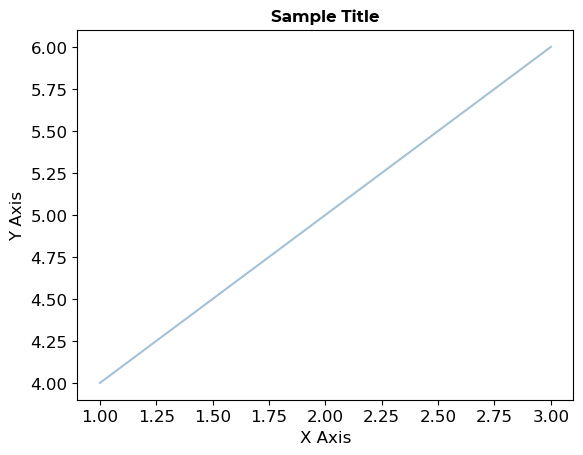

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

titleFontFam = font_manager.FontProperties(fname='Fonts/Montserrat-Bold.ttf')
printFontFam = font_manager.FontProperties(fname='Fonts/OpenSans-Regular.ttf')

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = printFontFam.get_family()
colors = ['#A4C2D6', '#C75D4D', '#7A8C69']

plt.title("Sample Title", fontproperties=titleFontFam)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.plot([1, 2, 3], [4, 5, 6], color=colors[0])
plt.show()

df = pd.read_csv('Data/Cust_Segmentation.csv')

C:\Users\simsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\simsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

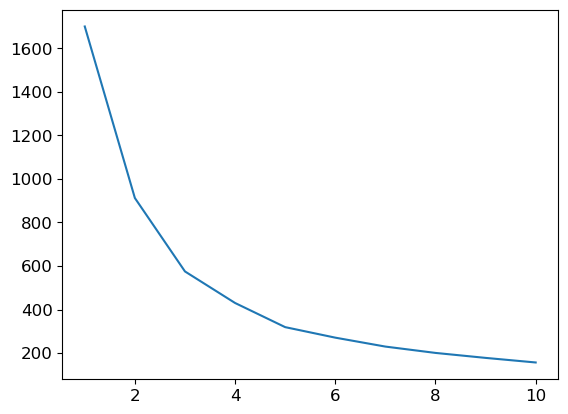

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

SCALER = StandardScaler()

df[['Income_T', 'Age_T']] = SCALER.fit_transform(df[['Income', 'Age']])

def optimize_k(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    plt.plot(means, inertias)
    plt.show()
    
optimize_k(df[['Income_T', 'Age_T']], 10)
        

C:\Users\simsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


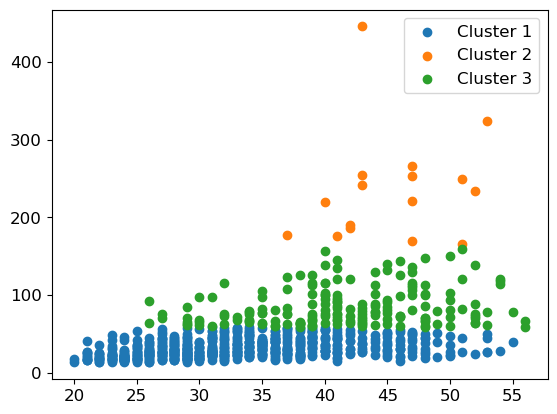

In [35]:
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(df[['Income', 'Age']])

df['label'] = Kmeans.labels_

fig, ax = plt.subplots()

for i in range(3):
    df_plot = df[df['label'] == i]
    ax.scatter(df_plot['Age'], df_plot['Income'])

plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [38]:
test_salary = float(input('Enter your salary: '))
test_age = float(input('Enter your age: '))

result = Kmeans.predict([[test_salary, test_age]])

print(result)

ValueError: could not convert string to float: ''

In [40]:
import pandas as pd
import numpy as np

# Example data: product prices and quantities over time
data = {
    'product': ['A', 'A', 'A', 'B', 'B', 'B'],
    'price_old': [10, 15, 20, 12, 18, 24],
    'price_new': [12, 14, 18, 15, 20, 25],
    'quantity_old': [100, 80, 60, 150, 120, 90],
    'quantity_new': [90, 85, 70, 140, 110, 80]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the percentage change in price and quantity
df['price_change_pct'] = (df['price_new'] - df['price_old']) / df['price_old']
df['quantity_change_pct'] = (df['quantity_new'] - df['quantity_old']) / df['quantity_old']

# Calculate price elasticity of demand (PED)
df['ped'] = df['quantity_change_pct'] / df['price_change_pct']

# Suggest price adjustment based on elasticity
df['suggested_price_action'] = np.where(df['ped'] > 1, 'Lower Price', 'Increase Price')

# Analyze the potential impact on sales volume and revenue
df['revenue_old'] = df['price_old'] * df['quantity_old']
df['revenue_new'] = df['price_new'] * df['quantity_new']
df['revenue_change'] = df['revenue_new'] - df['revenue_old']

# Display the DataFrame with calculations
print(df)

  product  price_old  price_new  quantity_old  quantity_new  price_change_pct  \
0       A         10         12           100            90          0.200000   
1       A         15         14            80            85         -0.066667   
2       A         20         18            60            70         -0.100000   
3       B         12         15           150           140          0.250000   
4       B         18         20           120           110          0.111111   
5       B         24         25            90            80          0.041667   

   quantity_change_pct       ped suggested_price_action  revenue_old  \
0            -0.100000 -0.500000         Increase Price         1000   
1             0.062500 -0.937500         Increase Price         1200   
2             0.166667 -1.666667         Increase Price         1200   
3            -0.066667 -0.266667         Increase Price         1800   
4            -0.083333 -0.750000         Increase Price         2160   


In [43]:
import pandas as pd

# Example data: Transaction Data
data = {
    'customer_id': [1, 1, 2, 2, 3, 3, 3],
    'order_id': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    'order_date': ['2022-01-01', '2022-03-15', '2022-01-10', '2022-04-20', '2022-02-10', '2022-06-01', '2022-08-15'],
    'revenue': [120, 80, 150, 90, 200, 250, 300],
    'customer_age': [30, 30, 40, 40, 25, 25, 25],
    'region': ['North', 'North', 'East', 'East', 'West', 'West', 'West']
}

# Convert to DataFrame
df = pd.DataFrame(data)
df['order_date'] = pd.to_datetime(df['order_date'])

# Calculate Total Revenue and Number of Purchases for each customer
cltv_df = df.groupby('customer_id').agg({
    'revenue': 'sum',          # Total revenue per customer
    'order_id': 'count',       # Number of purchases per customer
    'order_date': lambda x: (x.max() - x.min()).days  # Customer lifespan in days
}).reset_index()

# Rename columns
cltv_df.columns = ['customer_id', 'total_revenue', 'purchase_count', 'customer_lifespan_days']

# Calculate Average Order Value
cltv_df['avg_order_value'] = cltv_df['total_revenue'] / cltv_df['purchase_count']

# Calculate Purchase Frequency (as purchase count)
cltv_df['purchase_frequency'] = cltv_df['purchase_count']

# Assume an average lifespan in years
cltv_df['customer_lifespan_years'] = cltv_df['customer_lifespan_days'] / 365

# Calculate CLTV
cltv_df['cltv'] = cltv_df['avg_order_value'] * cltv_df['purchase_frequency'] * cltv_df['customer_lifespan_years']

# Display CLTV DataFrame
print(cltv_df)


   customer_id  total_revenue  purchase_count  customer_lifespan_days  \
0            1            200               2                      73   
1            2            240               2                     100   
2            3            750               3                     186   

   avg_order_value  purchase_frequency  customer_lifespan_years        cltv  
0            100.0                   2                 0.200000   40.000000  
1            120.0                   2                 0.273973   65.753425  
2            250.0                   3                 0.509589  382.191781  


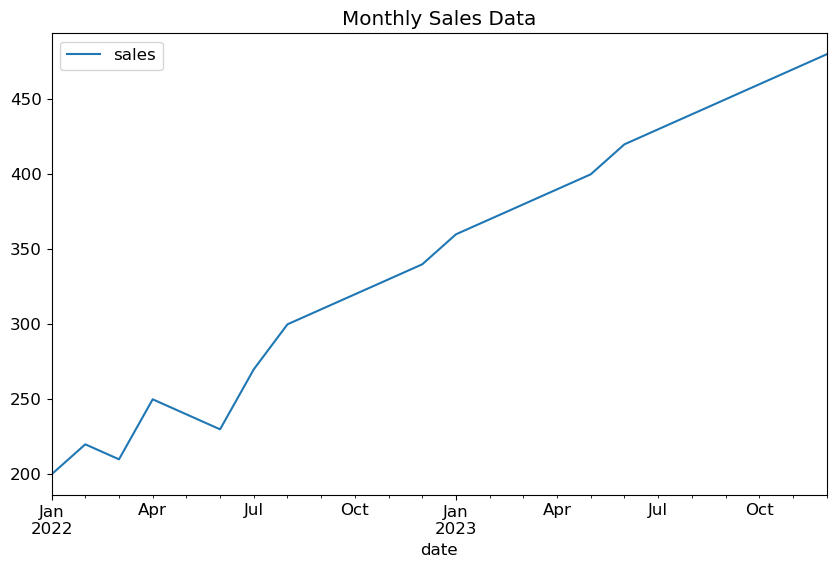

C:\Users\simsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\simsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\simsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\simsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\simsh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -92.748
Date:                Sat, 24 Aug 2024   AIC                            191.496
Time:                        22:24:13   BIC                            194.902
Sample:                    01-31-2022   HQIC                           192.353
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1635.880      0.000       0.999       1.001
ma.L1         -0.9980      0.265     -3.764      0.000      -1.518      -0.478
sigma2       163.4854      0.002      1e+05      0.0

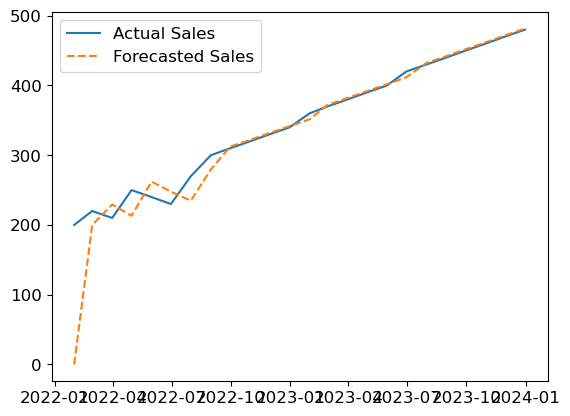

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Example sales data
data = {
    'date': pd.date_range(start='2022-01-01', periods=24, freq='M'),
    'sales': [200, 220, 210, 250, 240, 230, 270, 300, 310, 320, 330, 340,
              360, 370, 380, 390, 400, 420, 430, 440, 450, 460, 470, 480]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Plot sales data
df.plot(figsize=(10, 6))
plt.title('Monthly Sales Data')
plt.show()

# Fit ARIMA model (order = (p, d, q))
model = ARIMA(df['sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast future sales (e.g., next 6 months)
forecast = model_fit.forecast(steps=6)
print(forecast)

# Plot forecasted values along with historical data
df['forecast'] = model_fit.predict(start=0, end=len(df)-1)
plt.plot(df['sales'], label='Actual Sales')
plt.plot(df['forecast'], label='Forecasted Sales', linestyle='--')
plt.legend()
plt.show()